In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
import numpy as np

train = pd.read_csv('train_data.csv')

See the data

In [2]:
train.describe()

,Customer_Age,Dependent,onBook,Relationship,Inactive,ContactNum,CLimit,Revolving,Open,Amt_41,TransAmt,TransCt,Ct_41,Utilization,Importance,MustHave,Group,Essential,DropLevel,Class
count,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000
mean,46.286373,2.349177,35.925741,3.799737,2.339961,2.458855,12691.098792,777.010533,7361.702067,1.335039,1143.976541,64.842923,0.712417,0.061026,0.497547,49.796313,2.518367,4.994694,4.962080,1.160632
std,8.002996,1.304052,7.977072,1.556605,1.008929,1.105919,28.841335,2.929268,9000.665808,0.002883,2.878543,23.449585,0.237821,0.002902,0.288153,28.741485,1.487468,2.894647,2.925983,0.367215
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,12641.029520,772.000000,14.000000,1.330000,1139.000100,10.000000,0.000000,0.056000,0.000013,0.000000,0.000000,0.000085,0.000000,1.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,12666.288700,774.000000,1270.150000,1.332566,1141.465773,45.000000,0.581000,0.058513,0.245967,25.000000,1.000000,2.508975,2.000000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,12691.513690,777.000000,3423.000000,1.335059,1143.994218,67.000000,0.703000,0.061073,0.499618,49.000000,3.000000,4.975138,5.000000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,12715.916710,780.000000,9699.000000,1.337525,1146.439558,81.000000,0.820000,0.063528,0.744363,75.000000,4.000000,7.498516,8.000000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,12740.985200,782.000000,34516.000000,1.339999,1148.997368,134.000000,3.714000,0.065996,0.999934,100.000000,5.000000,9.999738,10.000000,2.000000


In [2]:
c=0
for i in range(len(train['Class'])):
    if train['Class'].loc[i] == 1:
        c+=1
print(c)

d=0
for i in range(len(train['Class'])):
    if train['Class'].loc[i] == 2:
        d+=1
print(d)
c/(c+d)
# ~80% of class observations are 1
# Intuition is that I do not need to do any sampling

6375
1220


0.8393680052666228

Standard Decision Tree

All features:
[['Customer_Age','Gender','Dependent','Education','Marital','Income','KCategory',
             'onBook','Relationship','Inactive','ContactNum','CLimit','Revolving','Open',
             'Amt_41','TransAmt','TransCt','Ct_41','Utilization','Importance','MustHave','Group',
             'Essential','DropLevel']]

In [3]:
df_model = train.copy()
# drops unknown incomes as it drops performance of prediction
df_model = df_model[df_model['Income']!='Unknown']

x = df_model.drop(columns=['Class'])
# create dummy variables for categorical features
x = pd.get_dummies(x, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)
y = df_model['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
clf = tree.DecisionTreeClassifier()

# Different hyper-parameters for the decision tree
param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,3,4,5,6,7,8,9,10,11,12],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 4, 6, 8]
    }
# ready's the hyper-parameters for the decision tree
grid = GridSearchCV(clf, param_grid=param, cv=10)

In [4]:
# fits all combinations of specified hyper-parameter for decision tree
grid.fit(x_train,y_train)
print(grid.best_params_) # prints the best parameters

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


In [5]:
# creates decision tree with the best parameters for the training data
clf = tree.DecisionTreeClassifier(criterion= grid.best_params_['criterion'], max_depth= grid.best_params_['max_depth'], 
                                  min_samples_split= grid.best_params_['min_samples_split'],splitter= grid.best_params_['splitter'])
tree_model = clf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
f1_score(y_test, y_pred)

0.9495726495726495

Text(0.5, 1.0, 'Confusion Matrix')

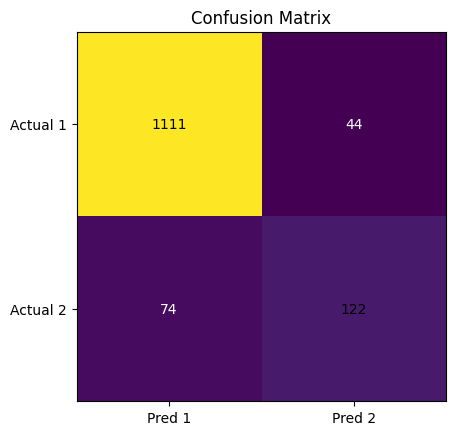

In [6]:
# Looks at predictions
cm = confusion_matrix(y_test, y_pred)
cols = ["Pred 1", "Pred 2"]
rows = ["Actual 1", "Actual 2"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(cols)), labels=cols)
plt.yticks(np.arange(len(rows)), labels=rows)

for i in range(len(cols)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

Standard Scalar Decision Tree

In [7]:
df_model = train.copy()

df_model = df_model[df_model['Income']!='Unknown']

x = df_model.drop(columns=['Class'])

x = pd.get_dummies(x, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = df_model['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
clf = tree.DecisionTreeClassifier()

param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15],
    "splitter": ["best", "random"],
    "min_samples_split": [2,4,6,8,10]
    }
grid = GridSearchCV(clf, param_grid=param, cv=10)

In [8]:
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


In [9]:
clf = tree.DecisionTreeClassifier(criterion= grid.best_params_['criterion'], max_depth= grid.best_params_['max_depth'], 
                                  min_samples_split= grid.best_params_['min_samples_split'],splitter= grid.best_params_['splitter'])
tree_model = clf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
f1_score(y_test, y_pred)

0.9499786233433092

Text(0.5, 1.0, 'Confusion Matrix')

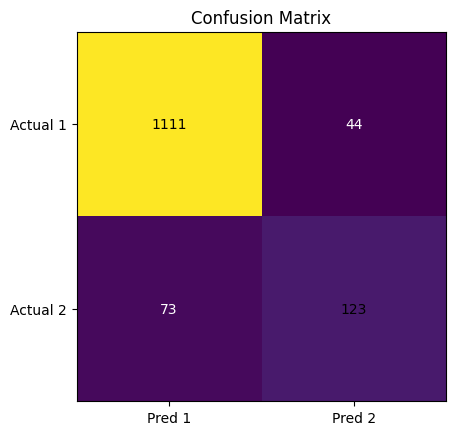

In [10]:
# Looks at predictions
cm = confusion_matrix(y_test, y_pred)
cols = ["Pred 1", "Pred 2"]
rows = ["Actual 1", "Actual 2"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(cols)), labels=cols)
plt.yticks(np.arange(len(rows)), labels=rows)

for i in range(len(cols)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

Robust Scaling Decision Tree

In [11]:
df_model = train.copy()

df_model = df_model[df_model['Income']!='Unknown']

x = df_model.drop(columns=['Class'])

x = pd.get_dummies(x, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)
scaler = RobustScaler()
x = scaler.fit_transform(x)
y = df_model['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
clf = tree.DecisionTreeClassifier()

param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 4, 6, 8]
    }
grid = GridSearchCV(clf, param_grid=param, cv=10)

In [12]:
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 4, 'splitter': 'best'}


In [13]:
clf = tree.DecisionTreeClassifier(criterion= grid.best_params_['criterion'], max_depth= grid.best_params_['max_depth'], 
                                  min_samples_split= grid.best_params_['min_samples_split'],splitter= grid.best_params_['splitter'])
tree_model = clf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
f1_score(y_test, y_pred)

0.9499786233433092

Text(0.5, 1.0, 'Confusion Matrix')

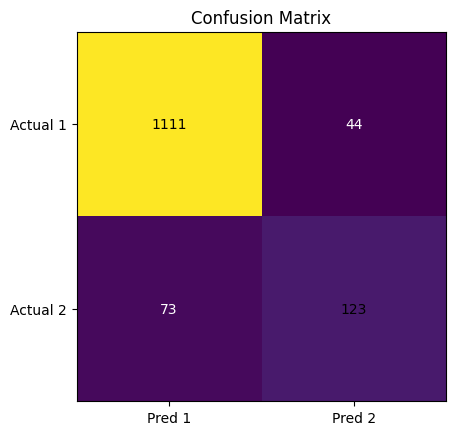

In [14]:
# Looks at predictions
cm = confusion_matrix(y_test, y_pred)
cols = ["Pred 1", "Pred 2"]
rows = ["Actual 1", "Actual 2"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(cols)), labels=cols)
plt.yticks(np.arange(len(rows)), labels=rows)

for i in range(len(cols)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

MinMax Scaler Decision Tree

In [15]:
df_model = train.copy()

df_model = df_model[df_model['Income']!='Unknown']

x = df_model.drop(columns=['Class'])

x = pd.get_dummies(x, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = df_model['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
clf = tree.DecisionTreeClassifier()

param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5,6,7,8,9,10,11,12,13,14,15],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 4, 6, 8]
    }
grid = GridSearchCV(clf, param_grid=param, cv=10)

In [16]:
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'splitter': 'best'}


In [17]:
clf = tree.DecisionTreeClassifier(criterion= grid.best_params_['criterion'], max_depth= grid.best_params_['max_depth'], 
                                  min_samples_split= grid.best_params_['min_samples_split'],splitter= grid.best_params_['splitter'])
tree_model = clf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
f1_score(y_test, y_pred)

0.9499786233433092

Text(0.5, 1.0, 'Confusion Matrix')

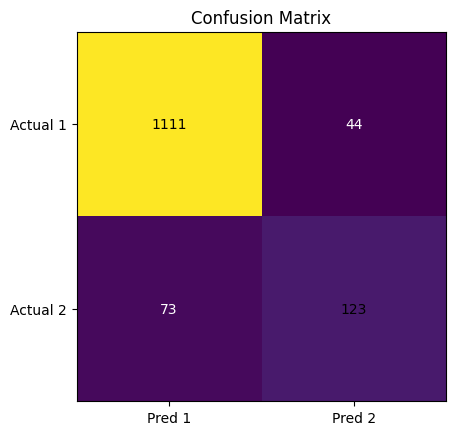

In [18]:
# Looks at predictions
cm = confusion_matrix(y_test, y_pred)
cols = ["Pred 1", "Pred 2"]
rows = ["Actual 1", "Actual 2"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(cols)), labels=cols)
plt.yticks(np.arange(len(rows)), labels=rows)

for i in range(len(cols)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

Logistic Regression

In [20]:
df_model = train.copy()
#drops unknown incomes as it drops performance of prediction
df_model = df_model[df_model['Income']!='Unknown']

x = df_model.drop(columns=['Class'])
x = pd.get_dummies(x, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)
y = df_model['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [21]:
logit = LogisticRegression()

param = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky"],
    "max_iter": [55, 60, 65, 70]
}

grid = GridSearchCV(logit, param_grid=param, cv =10)

In [22]:
grid.fit(x_train,y_train)
print(grid.best_params_)

/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

{'C': 0.23357214690901212, 'max_iter': 55, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
8000 fits failed out of a total of 12800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/linea

In [24]:
logit = LogisticRegression(C=grid.best_params_['C'], max_iter=grid.best_params_['max_iter'], penalty=grid.best_params_['penalty'], solver=grid.best_params_['solver'])
logit_reg = logit.fit(x_train, y_train)
y_pred = logit_reg.predict(x_test)
f1_score(y_test, y_pred)

0.9417190775681341

Text(0.5, 1.0, 'Confusion Matrix')

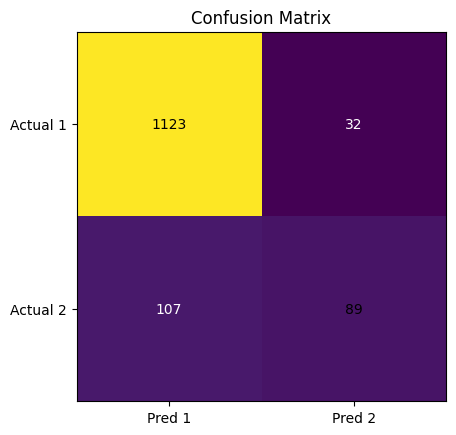

In [25]:
# Looks at predictions
cm = confusion_matrix(y_test, y_pred)
cols = ["Pred 1", "Pred 2"]
rows = ["Actual 1", "Actual 2"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(cols)), labels=cols)
plt.yticks(np.arange(len(rows)), labels=rows)

for i in range(len(cols)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

### Performance of every type of prediction models are about 95% while using GridSearchCV to identify best performing parameters

-> Not too much difference between prediction models and whether preprocessing happens or not
### Removing unkowns
-> Under the income feature, 'Unknown' does not appear to be a good predictor so, I opted to remove unknown observations from the dataset.

### Changes to training model;
    I will not use any scaler preprocessing since it doesn't make much of a difference. 
##### It appears that all models are more likely to predict 1 when its actually 2.
    To try and solve this bias, I will try to remove some observations where class = 1 to sway the bias from over predicting 1 and play with the class_weight parameter

In [16]:
df_model = train.copy()
class2 = df_model[df_model['Class']==2]
df_model = df_model.append(class2)
df_model = df_model.append(class2)
df_model = df_model.append(class2)
df_model = df_model.append(class2)

Customer_Age  Gender  Dependent  Education    Marital   Income          KCategory  onBook  Relationship  Inactive  ContactNum  CLimit       Revolving  Open     Amt_41    TransAmt     TransCt  Ct_41  Utilization  Importance  MustHave  Group  Essential  DropLevel  Class
40            F       3          Graduate     Single    Less than $40K  Blue       36      5             3         1           12679.49660  772        1516.0   1.339102  1139.552962  54       0.385  0.062060     0.051870    53        5      4.031959   4          2        5
39            F       3          Graduate     Married   Unknown         Blue       26      2             2         3           12695.55355  779        3521.0   1.332303  1140.703472  52       0.733  0.060088     0.981600    68        2      4.403050   6          2        5
45            M       5          Unknown      Married   $80K - $120K    Silver     39      2             2         3           12674.91227  777        32552.0  1.332152  1139.962005  

/var/folders/hb/vc7g33x55zj491kqzxj0jdm80000gn/T/ipykernel_53969/2673766277.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model = df_model.append(class2)
/var/folders/hb/vc7g33x55zj491kqzxj0jdm80000gn/T/ipykernel_53969/2673766277.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model = df_model.append(class2)
/var/folders/hb/vc7g33x55zj491kqzxj0jdm80000gn/T/ipykernel_53969/2673766277.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model = df_model.append(class2)
/var/folders/hb/vc7g33x55zj491kqzxj0jdm80000gn/T/ipykernel_53969/2673766277.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model = df_model.append(

In [8]:
len(df_model)

8815

In [5]:
# drops unknown incomes as it drops performance of prediction
df_model = df_model[df_model['Income']!='Unknown']

x = df_model.drop(columns=['Class'])
# create dummy variables for categorical features
x = pd.get_dummies(x, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)
y = df_model['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [6]:
clf = tree.DecisionTreeClassifier()
# Different hyper-parameters for the decision tree
param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,4,6,8,10,12],
    "splitter": ["best", "random"],
    "min_samples_split": [8,9,10,11,12]
    }
# ready's the hyper-parameters for the decision tree
grid = GridSearchCV(clf, param_grid=param, cv=10)
# fits all combinations of specified hyper-parameter for decision tree
grid.fit(x_train,y_train)
print(grid.best_params_) # prints the best parameters

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10, 'splitter': 'best'}


In [7]:
# creates decision tree with the best parameters for the training data
clf = tree.DecisionTreeClassifier(criterion=grid.best_params_['criterion'],max_depth=grid.best_params_['max_depth'],
                                  splitter=grid.best_params_['splitter'], min_samples_split=grid.best_params_['min_samples_split'],
                                  class_weight={1:0.42})
tree_model = clf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
f1_score(y_test, y_pred)

0.9031476997578692

In [8]:
# creates decision tree with the best parameters for the training data
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=None,
                                  splitter='best', min_samples_split=2, min_samples_leaf=1,
                                  class_weight={1:1.12})
tree_model = clf.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
f1_score(y_test, y_pred)

0.9219483568075119

Text(0.5, 1.0, 'Confusion Matrix')

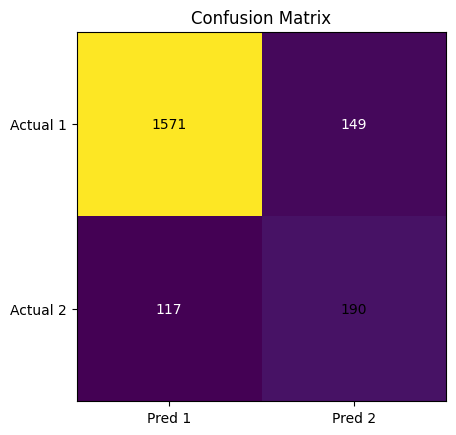

In [9]:
# Looks at predictions
cm = confusion_matrix(y_test, y_pred)
cols = ["Pred 1", "Pred 2"]
rows = ["Actual 1", "Actual 2"]

plt.imshow( cm )

# Show all ticks and label them with the respective list entries
plt.xticks(np.arange(len(cols)), labels=cols)
plt.yticks(np.arange(len(rows)), labels=rows)

for i in range(len(cols)):
    for j in range(len(rows)):
        if i == j:
            c = 'black'
        else:
            c = 'white'
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color=c)

plt.title( 'Confusion Matrix' )

#### Findings:
    It seems that no matter how many observations where class = 1 is removed, the model still wants to default unsure observations to 1
#
#
#### Test data
    

In [10]:
test = pd.read_csv('test_data.csv')

In [11]:
df_model = test.copy()
# drops unknown incomes as it drops performance of prediction
df_model = df_model[df_model['Income']!='Unknown']

# create dummy variables for categorical features
X = pd.get_dummies(df_model, columns=['Gender','Education','Marital','Income', 
                               'KCategory', 'Group'], drop_first=True)

# use tree_model to predict y
y_pred = tree_model.predict(X)

In [32]:
np.savetxt('/Users/ericwang/Desktop/ECON_148/Midterm/test_result1.csv.csv',y_pred, delimiter=',')

In [12]:
len(test)

2532

In [14]:
len(y_pred)

2261